In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV


#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the attribute names
# column_names = ["Class", "Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise",
#                 "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders",
#                 "Ascites", "Varices", "Bilirubin", "Alk Phosphate", "Sgot", "Albumin",
#                 "Protime", "Histology"]

# Read the dataset and add attribute names
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HepatitisCdata.csv')

# Display the first few rows of the dataframe
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

**Data CLeaning**

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
#mapping the values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
y = df['Category']
X = df.drop(['Category'], axis=1)

#Split data into test and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**Random Forest**

In [ ]:
## Hyperparameter Tunning for RF
# Model
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200]}

#Using GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Show the best estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")


Best n_estimators: 100


accuracy_random_Forest : 0.984
precision_random_Forest : 1.000
recall_random_Forest : 0.857
f1-score_random_Forest : 0.923
Prediction Time Random Forest: 0.0070 seconds


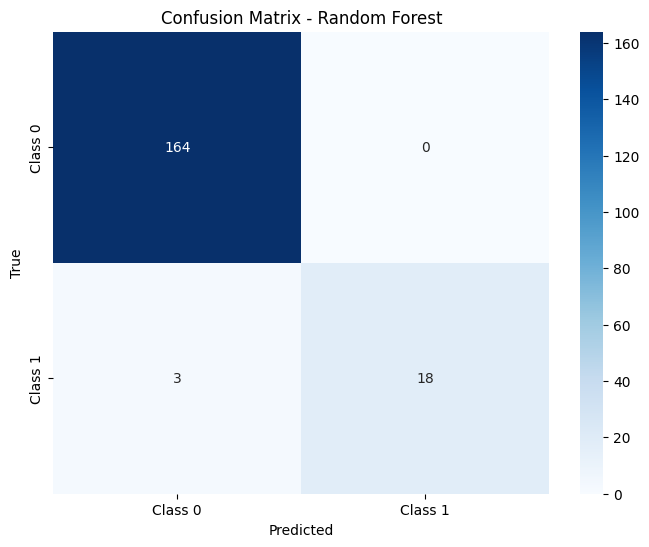

In [ ]:
random_forest = RandomForestClassifier(n_estimators=best_n_estimators)
random_forest.fit(X_train, y_train)
start_time_predict = time.time()
Y_prediction = random_forest.predict(X_test)
prediction_time_rf = time.time() - start_time_predict
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision_rf =precision_score(y_test, Y_prediction)
recall_rf =  recall_score(y_test, Y_prediction)
f1_rf = f1_score(y_test,Y_prediction)
# print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision_rf)
print('recall_random_Forest : %.3f' %recall_rf)
print('f1-score_random_Forest : %.3f' %f1_rf)
print('Prediction Time Random Forest: %.4f seconds' % prediction_time_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Logistic Regression**

accuracy_Logistic Regression : 0.973
precision_Logistic Regression : 0.900
recall_Logistic Regression: 0.857
f1-score_Logistic Regression : 0.878
Prediction Time Logistic Regression: 0.0013 seconds


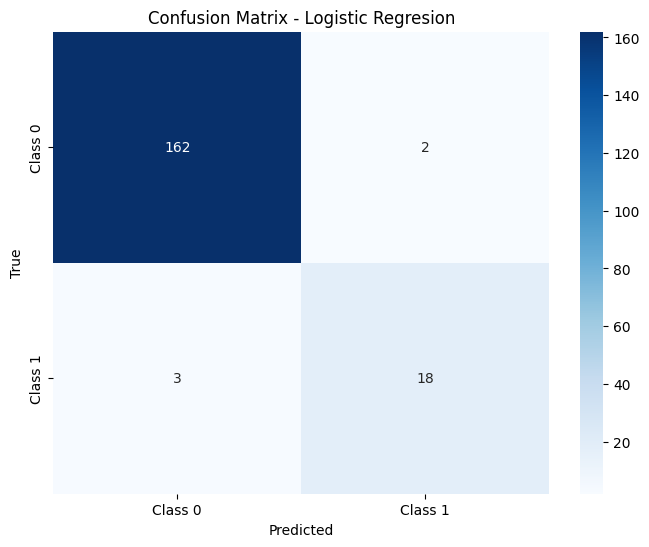

In [ ]:
#Supervised Learning pada Logistic Regression
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
start_time_predict_lr = time.time()
Y_pred = logreg.predict(X_test)
prediction_time_lr = time.time() - start_time_predict_lr
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision_lr =precision_score(y_test, Y_pred)
recall_lr =  recall_score(y_test, Y_pred)
f1_lr = f1_score(y_test,Y_pred)
# print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision_lr)
print('recall_Logistic Regression: %.3f' %recall_lr)
print('f1-score_Logistic Regression : %.3f' %f1_lr)
print('Prediction Time Logistic Regression: %.4f seconds' % prediction_time_lr)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regresion")
plt.show()

**Gaussian Naive Bayes**

accuracy_Naive Bayes: 0.935
precision_Naive Bayes: 0.667
recall_Naive Bayes: 0.857
f1-score_Naive Bayes : 0.750
Prediction Time Gaussian Naive Bayes: 0.0017 seconds


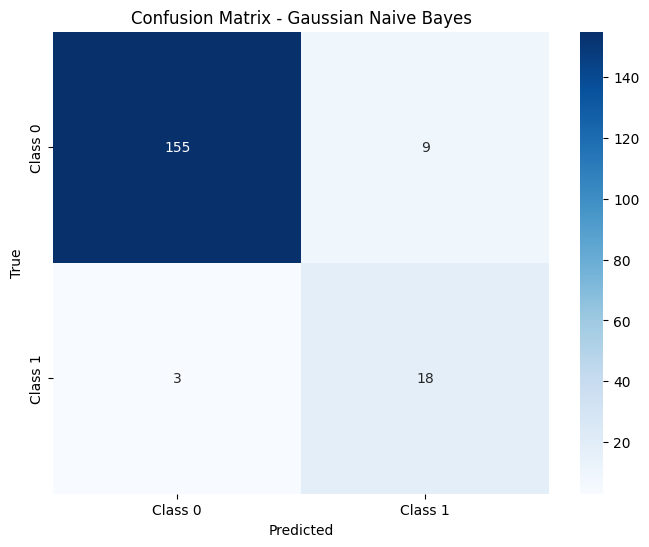

In [ ]:
#Supervised Learning pada Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
start_time_predict_nb = time.time()
Y_pred = gaussian.predict(X_test)
prediction_time_nb = time.time() - start_time_predict_nb
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision_nb =precision_score(y_test, Y_pred)
recall_nb =  recall_score(y_test, Y_pred)
f1_nb = f1_score(y_test,Y_pred)
# print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision_nb)
print('recall_Naive Bayes: %.3f' %recall_nb)
print('f1-score_Naive Bayes : %.3f' %f1_nb)
print('Prediction Time Gaussian Naive Bayes: %.4f seconds' % prediction_time_nb)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

**ANN**

In [ ]:
### Hyperparameter Tune For ANN
# Model
ann_model = MLPClassifier(solver='adam',max_iter=1000, early_stopping=True)

# Daftar parameter yang akan diuji
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=5)

# Melakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,)}


accuracy_ANN: 0.941
precision_ANN: 0.778
recall_ANN: 0.667
f1-score_ANN : 0.718
Prediction Time Artificial Neural Network: 0.0015 seconds


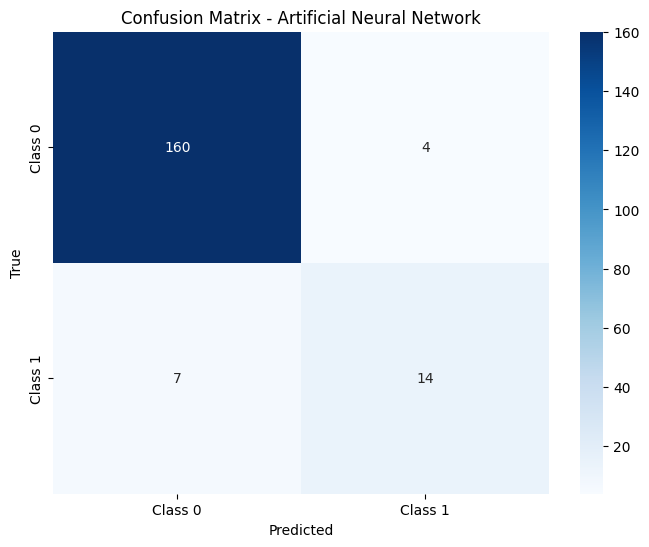

In [ ]:
# Membuat model dengan parameter terbaik
best_ann_model = MLPClassifier(max_iter=1000, **best_params)
best_ann_model.fit(X_train, y_train)
start_time_predict_ann = time.time()
Y_pred = best_ann_model.predict(X_test)
prediction_time_ann = time.time() - start_time_predict_ann
accuracy_ann = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_ann = round(best_ann_model.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision_ann =precision_score(y_test, Y_pred)
recall_ann =  recall_score(y_test, Y_pred)
f1_ann = f1_score(y_test,Y_pred)
# print('Confusion matrix for ANN \n',cm)
print('accuracy_ANN: %.3f' %accuracy)
print('precision_ANN: %.3f' %precision_ann)
print('recall_ANN: %.3f' %recall_ann)
print('f1-score_ANN : %.3f' %f1_ann)
print('Prediction Time Artificial Neural Network: %.4f seconds' % prediction_time_ann)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Artificial Neural Network")
plt.show()

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Random Forest',
              'Naive Bayes',
              'Neural Network'],
    'Score': [acc_log,
              acc_random_forest,
              acc_gaussian,
              acc_ann],
    "Accuracy_score": [accuracy_lr,
                       accuracy_rf,
                       accuracy_nb,
                       accuracy_ann],
    "Precision": [precision_lr,
                  precision_rf,
                  precision_nb,
                  precision_ann],
    "Recall": [recall_lr,
               recall_rf,
               recall_nb,
               recall_ann],
    "F1-score": [f1_lr,
                 f1_rf,
                 f1_nb,
                 f1_ann],
    "Prediction Time": [
        prediction_time_rf,
        prediction_time_lr,
        prediction_time_nb,
        prediction_time_ann
    ]
})

result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)


,Model,Score,Accuracy_score,Precision,Recall,F1-score,Prediction Time
0,Random Forest,100.00,98.38,1.000000,0.857143,0.923077,0.001317
1,Logistic Regression,96.74,97.30,0.900000,0.857143,0.878049,0.006990
2,Neural Network,95.58,94.05,0.777778,0.666667,0.717949,0.001489
3,Naive Bayes,92.79,93.51,0.666667,0.857143,0.750000,0.001659


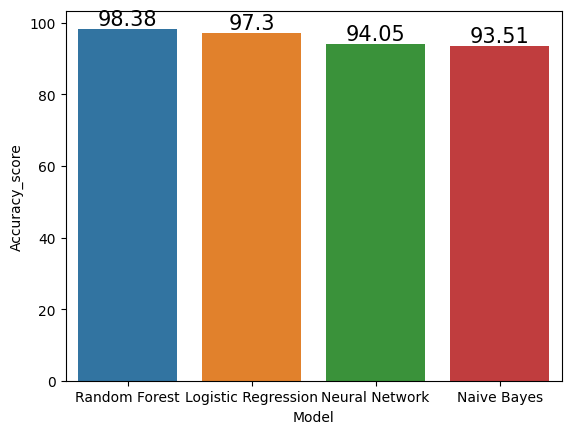

In [ ]:
#Visualisasi Pada hasil setiap model Supervised Learningplt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')